# Guided Project: Feature Engineering - Speech Classification

Linear Discriminant Analysis (LDA) is a dimesionality reduction technique used to reduce the number of dimensions(Variables) in a dataset while retianing as much information as possible.
Using LDA based classification, we can find discriminative features for a given audio segment to achieve the task of Automatic Speech Classification such that speech belonging to the same class are together, but samples from differreent classes are far apart.

Challenge (Question):
    In Order to implement LDA, first generate a dummy dataset (say Iris Datset having 4 features)and use LDA to decrease the number of features to 1 or 2. Now using this modified dataset, try to learn a classifier to test the performance of LDA for dimensionality reduction.

Below Python code serves as one Solution to the Challenge by Tejaswini J.

In [1]:
#Importing the necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the datset
iris_data = pd.read_csv( 'iris.data.csv', header = None )


iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform( iris_data[ 4 ].values )

#Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform( iris_data.iloc[ :, range( 0,4 )].values ) 

#Construct within-class covariant scatter matrix S_W
S_W = np.zeros( ( 4, 4 ) )
for i in range( 3 ):
    S_W += np.cov( X_train_std[ y == i ].T )

S_W

array([[1.16722735, 0.78296373, 0.34611786, 0.18386817],
       [0.78296373, 1.8615894 , 0.21806165, 0.30505192],
       [0.34611786, 0.21806165, 0.1796358 , 0.09541594],
       [0.18386817, 0.30505192, 0.09541594, 0.21784923]])

In [6]:
#Construct between-class scatter matrix S_B
N = np.bincount( y ) # number of samples for given class
vecs = []
[ vecs.append( np.mean( X_train_std[ y == i ],axis = 0 ) ) for i in range( 3 ) ] # class means
mean_overall = np.mean( X_train_std, axis = 0 ) # overall mean
S_B = np.zeros( ( 4, 4 ) )
for i in range( 3 ):
    S_B += N[ i ]*( ( ( vecs[ i ] - mean_overall ).reshape( 4,1) ).dot( ( ( vecs[ i ] - mean_overall ).reshape( 1, 4) ) ) )


S_B

array([[ 92.80585961, -54.77061003, 113.8033484 , 113.68350465],
       [-54.77061003,  58.78211947, -73.76243518, -68.42915731],
       [113.8033484 , -73.76243518, 141.19784603, 139.73818372],
       [113.68350465, -68.42915731, 139.73818372, 139.3253878 ]])

In [7]:
#Calculate sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig( np.linalg.inv( S_W ).dot( S_B ) )
eigen_pairs = [ (np.abs( eigen_vals[ i ] ), eigen_vecs[ :, i ] ) for i in range( len( eigen_vals ) ) ]
eigen_pairs = sorted( eigen_pairs,key = lambda k: k[ 0 ], reverse = True )
print( 'Eigenvalues in decreasing order:\n' )
for eigen_val in eigen_pairs:
    print( eigen_val[ 0 ] )

Eigenvalues in decreasing order:

1581.3259321867629
13.60077632816224
1.5798874091613385e-13
1.5798874091613385e-13


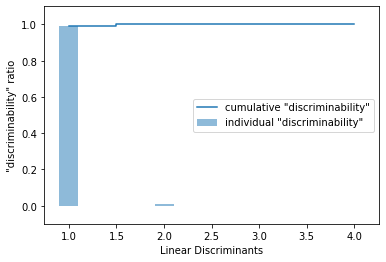

In [8]:
#Plot main LDA components
tot = sum( eigen_vals.real )
discr = [ ( i / tot ) for i in sorted( eigen_vals.real, reverse = True ) ]
cum_discr = np.cumsum( discr )
plt.bar( range( 1, 5 ), discr, width = 0.2, alpha = 0.5, align = 'center', label = 'individual "discriminability" ' )
plt.step( range( 1, 5 ), cum_discr, where = 'mid', label = 'cumulative "discriminability" ' )
plt.ylabel( '"discriminability" ratio' )
plt.xlabel( 'Linear Discriminants' )
plt.ylim( [ -0.1, 1.1 ] )
plt.legend( loc = 'best' )
plt.show()

In [10]:
#Project original features onto the new feature space
W = np.hstack( ( eigen_pairs[ 0 ][ 1 ][ :, ].reshape( 4, 1 ),eigen_pairs[ 1 ][ 1 ][ :, ].reshape( 4, 1 ) ) ).real
X_train_lda = X_train_std.dot( W )

#Plot transformed features in LDA subspace

data = pd.DataFrame( X_train_lda )
data[ 'class' ] = y
data.columns=[ "LD1", "LD2", "class" ]
data.head()

,LD1,LD2,class
0,1.790936,0.115414,0
1,1.583202,-0.265463,0
2,1.663881,-0.083657,0
3,1.514646,-0.225901,0
4,1.807076,0.189973,0


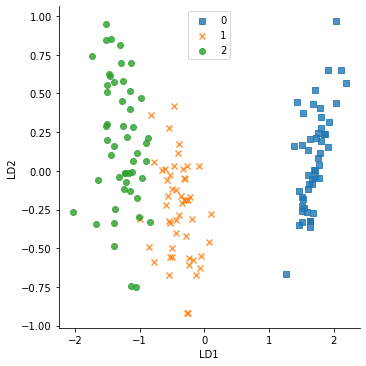

In [11]:
markers = [ 's', 'x','o' ]
sns.lmplot( x = "LD1", y = "LD2", data = data, markers = markers, fit_reg = False, hue = 'class', legend = False )
plt.legend( loc = 'upper center' )
plt.show()

# LDA implementation using scikit-learn

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis( n_components = 2 )
X_train_lda = lda.fit_transform( X_train_std, y )

data=pd.DataFrame( X_train_lda )
data[ 'class' ]=y
data.columns=[ "LD1", "LD2", "class" ]
data.head()

,LD1,LD2,class
0,8.084953,0.328454,0
1,7.147163,-0.755473,0
2,7.511378,-0.238078,0
3,6.837676,-0.642885,0
4,8.157814,0.540639,0


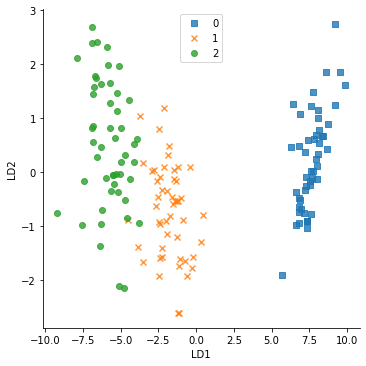

In [13]:
markers = [ 's', 'x', 'o' ]
colors = [ 'r', 'b','g' ]
sns.lmplot( x = "LD1", y = "LD2", data = data, hue = 'class', markers = markers, fit_reg = False, legend = False )
plt.legend( loc = 'upper center' )
plt.show()